# Library Imports

In [1]:
# First XGBoost model for Pima Indians dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import rcParams 
sns.set_theme(style="ticks")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Meiryo']

# Loading from CSV

In [2]:
FIG_OUTPUT = "./fig/"

credit = pd.read_csv("german_credit.csv")
credit_raw = credit.copy(deep=True)
pd.options.display.max_columns = None
# Flipping values in creditability such that minority classes 
credit_raw["Creditability"] = credit["Creditability"].apply(lambda x: 1-x)

In [3]:
credit_raw

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,0,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,0,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,0,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,0,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,1,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,1,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


In [4]:
#turn into Japanese columns

columns_JP = {
    "Creditability" : "信用(Y)",
    "Account Balance" : "銀行口座残高",
    "Duration of Credit (month)" : "ローン期間",
    "Payment Status of Previous Credit" : "前回のローンの状態",
    "Purpose": "目的",
    "Credit Amount": "ローン金額",
    "Value Savings/Stocks" : "貯金・株残高",
    "Length of current employment" : "雇用期間（ただいまの仕事）",
    "Instalment per cent" : "収入に対しローンの割合", 
    "Sex & Marital Status" : "性別・婚姻状況",
    "Guarantors" : "保証人",
    "Duration in Current address" : "現住所に住んでいた期間",
    "Most valuable available asset" : "最も価値のあるアセット",
    "Age (years)" : "年齢",
    "Concurrent Credits" : "その他のローン",
    "Type of apartment" : "住所タイプ",
    "No of Credits at this Bank" : "同銀行ローン数",
    "Occupation" : "職業",
    "No of dependents" : "扶養者数",
    "Telephone" : "電話",
    "Foreign Worker" : "労働形態"
}

credit_raw.rename(columns=columns_JP, inplace=True)
credit_raw	

,信用(Y),銀行口座残高,ローン期間,前回のローンの状態,目的,ローン金額,貯金・株残高,雇用期間（ただいまの仕事）,収入に対しローンの割合,性別・婚姻状況,保証人,現住所に住んでいた期間,最も価値のあるアセット,年齢,その他のローン,住所タイプ,同銀行ローン数,職業,扶養者数,電話,労働形態
0,0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,0,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,0,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,0,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,0,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,1,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,1,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


# Data preprocessing

In [5]:
#Separation of ratio valued data into bins while maintaining the real data
credit_raw["年齢_cat"] = pd.cut(x=credit_raw["年齢"], bins=[0,25,39,59,64,150], labels=[i for i in range(1,6,1)]).astype("int64")
credit_raw["ローン期間_cat"] = pd.cut(x=credit_raw["ローン期間"], bins=[-1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 73], labels=[i for i in range(1, 11, 1)]).astype("int64")
credit_raw["ローン金額_cat"] = pd.cut(x=credit_raw["ローン金額"], bins=[-1, 500, 1000, 1500, 2500, 5000, 7500, 10000, 15000, 20000], labels=[i for i in range(1, 10, 1)]).astype("int64")

In [6]:
credit_raw

,信用(Y),銀行口座残高,ローン期間,前回のローンの状態,目的,ローン金額,貯金・株残高,雇用期間（ただいまの仕事）,収入に対しローンの割合,性別・婚姻状況,保証人,現住所に住んでいた期間,最も価値のあるアセット,年齢,その他のローン,住所タイプ,同銀行ローン数,職業,扶養者数,電話,労働形態,年齢_cat,ローン期間_cat,ローン金額_cat
0,0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1,1,3,3
1,0,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1,2,2,5
2,0,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1,1,2,2
3,0,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2,2,2,4
4,0,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1,1,4,4
996,1,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1,3,4,4
997,1,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1,2,4,8
998,1,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1,3,2,6


In [7]:
# merge categories into more representative ones, according to https://online.stat.psu.edu/stat508/resources/analysis/gcd/gcd.1

to_modify = ("銀行口座残高", 
                "前回のローンの状態", 
                "貯金・株残高", 
                "雇用期間（ただいまの仕事）", 
                "職業", 
                "性別・婚姻状況",
                "同銀行ローン数",
                "保証人",
                "その他のローン",
                "目的"
                ) 


def merge_categories(val, name=None):
    columns = {"銀行口座残高":{
                    1:1, 2:2, 3:3, 4:3
                }, 
                "前回のローンの状態" : {
                    0:0, 1:0, 2:1, 3:2, 4:2
                }, 
                "貯金・株残高" : {
                    1:1, 2:2, 3:3, 4:3, 5:4
                }, 
                "雇用期間（ただいまの仕事）" : {
                    1:1, 2:1, 3:2, 4:3, 5:4 
                }, 
                "職業" : {
                    1:1, 2:1, 3:2, 4:3
                }, 
                "性別・婚姻状況" : {
                    1:1, 2:1, 3:2, 4:3
                },
                "同銀行ローン数" : {
                    1:1, 2:2, 3:2, 4:2
                },
                "保証人" : {
                    1:1, 2:2, 3:2
                },
                "その他のローン" : {
                    1:1, 2:1, 3:2
                },
                "目的" : {
                    0:0, 1:1, 2:2, 3:3, 4:3, 5:3, 6:3, 7:4, 8:5, 9:6, 10:7
                }
                }
    return int(columns[name][val])

for column in to_modify:
    credit_raw[column] = credit_raw[column].apply(func=merge_categories, name=column)


# save "clean" data

credit_raw.to_csv("clean_XGB.csv", encoding='utf-8-sig')

In [8]:
#split the dataframe 
credit_Y = credit_raw["信用(Y)"].copy(deep=True)
credit_X = credit_raw.drop("信用(Y)", axis=1)
chipruned_X = pd.read_csv("chipruned.csv", index_col=0).drop("信用(Y)", axis=1)
chipruned_Y = pd.read_csv("chipruned.csv", index_col=0)["信用(Y)"].copy(deep=True)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

onehot_columns =   ["年齢_cat", 
                    "ローン期間_cat", 
                    "ローン金額_cat", 
                    "銀行口座残高",
                    "前回のローンの状態",
                    "目的",
                    "貯金・株残高",
                    "雇用期間（ただいまの仕事）",
                    "収入に対しローンの割合",
                    "性別・婚姻状況",
                    "保証人",
                    "現住所に住んでいた期間",
                    "最も価値のあるアセット",
                    "その他のローン",
                    "住所タイプ",
                    "同銀行ローン数",
                    "職業",
                    "扶養者数",
                    "電話",
                    "労働形態"]


column_trans = ColumnTransformer([("onehot", OneHotEncoder(dtype='int', handle_unknown="ignore"), onehot_columns)], remainder="passthrough")
test2 = column_trans.fit_transform(credit_X)

print(test2)

  (0, 0)	1
  (0, 7)	1
  (0, 17)	1
  (0, 24)	1
  (0, 29)	1
  (0, 32)	1
  (0, 37)	1
  (0, 41)	1
  (0, 48)	1
  (0, 49)	1
  (0, 52)	1
  (0, 57)	1
  (0, 59)	1
  (0, 63)	1
  (0, 64)	1
  (0, 67)	1
  (0, 70)	1
  (0, 72)	1
  (0, 74)	1
  (0, 76)	1
  (0, 78)	18
  (0, 79)	1049
  (0, 80)	21
  (1, 1)	1
  (1, 6)	1
  :	:
  (998, 79)	6468
  (998, 80)	52
  (999, 1)	1
  (999, 9)	1
  (999, 20)	1
  (999, 24)	1
  (999, 28)	1
  (999, 32)	1
  (999, 40)	1
  (999, 44)	1
  (999, 48)	1
  (999, 50)	1
  (999, 52)	1
  (999, 57)	1
  (999, 59)	1
  (999, 63)	1
  (999, 65)	1
  (999, 67)	1
  (999, 70)	1
  (999, 72)	1
  (999, 74)	1
  (999, 76)	1
  (999, 78)	30
  (999, 79)	6350
  (999, 80)	31


# Helper methods definition

In [1]:
#sklearn import
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

#imbalanced learn import
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN

# XGBoost import
import xgboost as xgb


In [9]:
#illustrating that smote, from the imbalanced sampling library, has the "fit_sample" 

from imblearn.over_sampling import SMOTE
smote =  SMOTE()
hasattr(smote, "fit_sample")

True

In [10]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
hasattr(log, "fit_sample")

False

In [14]:
# helper method for evaluating model 
def evaluate_model(X, y, metric, model):
# define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model on the dataset
    scores = cross_val_score(model, X, y, scoring=metrics[metric], cv=cv, n_jobs=-1)
    # return scores from each fold and each repeat
    return scores

# helper method for precision scoring 
def precision_recall_auc(y_true, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred, pos_label=1)
    return auc(recall, precision)

ftwo_scorer = make_scorer(fbeta_score, beta=2)
pr_auc = make_scorer(score_func=precision_recall_auc, needs_proba=True)

#column names to be onehot encoded 

onehot_columns =   ["年齢_cat", 
                    "ローン期間_cat", 
                    "ローン金額_cat", 
                    "銀行口座残高",
                    "前回のローンの状態",
                    "目的",
                    "貯金・株残高",
                    "雇用期間（ただいまの仕事）",
                    "収入に対しローンの割合",
                    "性別・婚姻状況",
                    "保証人",
                    "現住所に住んでいた期間",
                    "最も価値のあるアセット",
                    "その他のローン",
                    "住所タイプ",
                    "同銀行ローン数",
                    "職業",
                    "扶養者数",
                    "電話",
                    "労働形態"]

param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
# param["eval_metric"] = ["error"]
param['eta'] = 0.1
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['colsample_bytree']=1
param['silent'] = 1
param['seed'] = 0
param['base_score'] = 0.5
param["num_estimator"] = 500

#define the pipelines parameters 
results = []

# metrics = {"accuracy" : "accuracy", 
#             "f1" : "f1", 
#             "roc_auc" : "roc_auc", 
#             "precision" : "precision", 
#             "pr_auc": "average_precision",
#             "pr_aucmanual" : pr_auc,
#             "recall" : "recall"
# }

metrics = {
    "f2" : ftwo_scorer
}

samplings = ["None", 
            "Random",
            ("SMOTEOnly", SMOTE()),
            ("SMOTETomek", SMOTETomek()),
            ("SMOTEENN", SMOTEENN())
            ] 

models = [
    ("logistic", LogisticRegression()),
    ("XGBDefault", xgb.XGBClassifier(**param))]


# Prototype evaluation loop

In [15]:
#サンプリング手法をループする
for sampling in samplings:
    #モデルをループする
    for model in models:
        
        #結果をセーブするdict()
        model_result = dict()
        seq = []

        #one hot transformer for all columns (Note, before undersampling/oversampling )
        seq.append(("SelectOneHot", ColumnTransformer([("onehot", OneHotEncoder(dtype='int', handle_unknown="ignore"), onehot_columns)], remainder="passthrough")))

        
        #randomはチェインするので特別扱い, Pipelineを使う
        if sampling == "None":
            pass
        elif sampling == "Random":
            seq.append(("RandomOver", RandomOverSampler()))
            seq.append(("RandomUnder", RandomUnderSampler()))
        else:
            seq.append(sampling)

        #append analytical model 
        seq.append(model)
        pipe = Pipeline(seq)
        
        #Pipeの名前を取り出す
        name = ""
        for step in pipe.steps:
            name += str(step[0])
            name += ", "
        model_result["pipe"] = name

        #メトリックスをループする
        for metric in metrics:
            scores = evaluate_model(credit_X, credit_Y, metric, pipe) 
            model_result[metric + "_mean"] = np.mean(scores)
            model_result[metric + "_var"] = np.var(scores)
            # print(f'{metric} Mean: {np.mean(scores)}, (Var:{np.var(scores)})' )
            
        results.append(model_result)


In [16]:
#highlight final results within dataframe
final_results = pd.DataFrame(results).set_index('pipe')
final_results.style.highlight_max(color = 'red', axis = 0)

,f2_mean,f2_var
pipe,,
"SelectOneHot, logistic,",0.510372,0.006392
"SelectOneHot, XGBDefault,",0.506940,0.006825
"SelectOneHot, RandomOver, RandomUnder, logistic,",0.654275,0.006159
"SelectOneHot, RandomOver, RandomUnder, XGBDefault,",0.561395,0.005574
"SelectOneHot, SMOTEOnly, logistic,",0.557619,0.008355
"SelectOneHot, SMOTEOnly, XGBDefault,",0.489289,0.009180
"SelectOneHot, SMOTETomek, logistic,",0.563590,0.005502
"SelectOneHot, SMOTETomek, XGBDefault,",0.498034,0.007739
"SelectOneHot, SMOTEENN, logistic,",0.606791,0.003266


# Gridsearch for hyperparameter optimization

In [93]:
#grid search for hyperparameter optimization 
/
from sklearn.model_selection import GridSearchCV



XGBgrid = {"XGB__learning_rate"    : [0.10, 0.20, 0.30] ,
 "XGB__max_depth"        : [ 1, 2, 3],
 "XGB__min_child_weight" : [ 3, 5, 7],
 "XGB__gamma"            : [ 0.0, 0.2],
 "XGB__colsample_bytree" : [ 0.3, 0.5]
  }


models = [("XGB", xgb.XGBClassifier(**param))]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

final_results = {}

#サンプリング手法をループする
for sampling in samplings:
    #モデルをループする
    for model in models:
        
        #結果をセーブするdict()
        model_result = dict()
        seq = []

        #one hot transformer for all columns (Note, before undersampling/oversampling )
        # seq.append(("SelectOneHot", ColumnTransformer([("onehot", OneHotEncoder(dtype='int', handle_unknown="ignore"), onehot_columns)], remainder="passthrough")))

        #onehot for everything in chipruned_X
        seq.append(("OneHot", OneHotEncoder(dtype='int', handle_unknown="ignore")))


        #randomはチェインするので特別扱い, Pipelineを使う
        if sampling == "None":
            pass
        elif sampling == "Random":
            seq.append(("RandomOver", RandomOverSampler()))
            seq.append(("RandomUnder", RandomUnderSampler()))
        else:
            seq.append(sampling)

        #append analytical model 
        seq.append(model)
        pipe = Pipeline(seq)

        #メトリックスをループする
        for metric in metrics:

            #Pipeの名前を取り出す
            name = ""
            for step in pipe.steps:
                name += str(step[0])
                name += ", "
            print("Now evaluating: " + name)

            print("GridSearching...")

            grid = GridSearchCV(estimator=pipe, 
                                param_grid=XGBgrid, 
                                n_jobs=-1, 
                                cv=cv,
                                scoring= metrics[metric],
                                verbose=5)
            
            # execute the grid search
            grid_result = grid.fit(chipruned_X, chipruned_Y)

            final_results[name] = pd.DataFrame(grid_result.cv_results_)

            # #report ebst configuration
            # print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
            # # report all configurations
            # means = grid_result.cv_results_['mean_test_score']
            # stds = grid_result.cv_results_['std_test_score']
            # params = grid_result.cv_results_['params']

            # for mean, stdev, param in zip(means, stds, params):
            #     print(f'{metric}:{mean} ({stdev}) with: {param}')



Now evaluating: OneHot, XGB, 
GridSearching...
Fitting 30 folds for each of 108 candidates, totalling 3240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  1.0m

In [96]:
writer = pd.ExcelWriter("XGBoost_Grid_chi2.xlsx")

for pipe_name, result in final_results.items():
    result.to_excel(writer, pipe_name)

writer.save()

C:\Users\undec\miniconda3\envs\imba\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [97]:
final_results.keys()

dict_keys(['OneHot, XGB, ', 'OneHot, RandomOver, RandomUnder, XGB, ', 'OneHot, SMOTEOnly, XGB, ', 'OneHot, SMOTETomek, XGB, ', 'OneHot, SMOTEENN, XGB, '])

# Post-processing and result presentation

In [40]:
grid_chi = pd.read_excel("XGBoost_Grid_chi2.xlsx", sheet_name = None)

In [80]:
test = grid_chi['OneHot, XGB, ']
test.columns

Index(['Unnamed: 0', 'mean_fit_time', 'std_fit_time', 'mean_score_time',
       'std_score_time', 'param_XGB__colsample_bytree', 'param_XGB__gamma',
       'param_XGB__learning_rate', 'param_XGB__max_depth',
       'param_XGB__min_child_weight', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'split10_test_score', 'split11_test_score', 'split12_test_score',
       'split13_test_score', 'split14_test_score', 'split15_test_score',
       'split16_test_score', 'split17_test_score', 'split18_test_score',
       'split19_test_score', 'split20_test_score', 'split21_test_score',
       'split22_test_score', 'split23_test_score', 'split24_test_score',
       'split25_test_score', 'split26_test_score', 'split27_test_score',
       'split28_test_score', 'split29_test_score', 'mean_test_score',
     

In [116]:
XGBoost_results = pd.DataFrame()

pd.set_option('display.max_columns', None)

#read chisquared clean data 
grid_chi = pd.read_excel("XGBoost_Grid_chi2.xlsx", sheet_name = None)
grid_raw = pd.read_excel("XGBoost_Grid_raw.xlsx", sheet_name = None)


for sheet_name, df in grid_raw.items():
    t = {}
    t["f2-mean-best"] = df[df["rank_test_score"] == 1]["mean_test_score"].values
    t["f2-std-best"] = df[df["rank_test_score"] == 1]["std_test_score"].values
    t["col_sample"] = df[df["rank_test_score"] == 1]["param_XGB__colsample_bytree"].values
    t["gamma"] = df[df["rank_test_score"] == 1]["param_XGB__gamma"].values
    t["min_child_weight"] = df[df["rank_test_score"] == 1]["param_XGB__min_child_weight"].values
    t["learning_rate"] = df[df["rank_test_score"] == 1]["param_XGB__learning_rate"].values
    t["max_depth"] = df[df["rank_test_score"] == 1]["param_XGB__max_depth"].values
    t["pipe"] = sheet_name

    t = pd.DataFrame(t)
    XGBoost_results = pd.concat([XGBoost_results, pd.DataFrame(t)])


for sheet_name, df in grid_chi.items():
    t = {}
    t["f2-mean-best"] = df[df["rank_test_score"] == 1]["mean_test_score"].values
    t["f2-std-best"] = df[df["rank_test_score"] == 1]["std_test_score"].values
    t["col_sample"] = df[df["rank_test_score"] == 1]["param_XGB__colsample_bytree"].values
    t["gamma"] = df[df["rank_test_score"] == 1]["param_XGB__gamma"].values
    t["min_child_weight"] = df[df["rank_test_score"] == 1]["param_XGB__min_child_weight"].values
    t["learning_rate"] = df[df["rank_test_score"] == 1]["param_XGB__learning_rate"].values
    t["max_depth"] = df[df["rank_test_score"] == 1]["param_XGB__max_depth"].values
    t["pipe"] = sheet_name

    t = pd.DataFrame(t)
    XGBoost_results = pd.concat([XGBoost_results, pd.DataFrame(t)])


XGBoost_results.set_index("pipe")



,f2-mean-best,f2-std-best,col_sample,gamma,min_child_weight,learning_rate,max_depth
pipe,,,,,,,
"SelectOneHot, XGB,",0.534609,0.081464,0.5,0.2,5,0.3,3
"SelectOneHot, RandomOver, RandomUnder, XGB,",0.647590,0.065959,0.5,0.2,3,0.1,3
"SelectOneHot, SMOTEOnly, XGB,",0.530889,0.082562,0.5,0.2,3,0.3,3
"SelectOneHot, SMOTETomek, XGB,",0.530506,0.091869,0.5,0.0,5,0.3,3
"SelectOneHot, SMOTEENN, XGB,",0.580666,0.083312,0.3,0.0,3,0.3,3
"OneHot, XGB,",0.508590,0.073404,0.3,0.0,5,0.3,3
"OneHot, RandomOver, RandomUnder, XGB,",0.685449,0.054224,0.5,0.2,7,0.2,1
"OneHot, SMOTEOnly, XGB,",0.689328,0.057725,0.5,0.0,3,0.1,1
"OneHot, SMOTETomek, XGB,",0.688580,0.055802,0.5,0.0,7,0.1,1


# Feature importance extractor

In [105]:
from sklearn.model_selection import cross_validate
clf = xgb.XGBClassifier()

scores = cross_validate(clf, credit_X, credit_Y,
                        scoring=ftwo_scorer, cv=5,
                        return_estimator=True)

scores['estimator'][0].feature_importances_




C:\Users\undec\miniconda3\envs\imba\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[16:27:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:13] WARNING: ..\src\learn

array([0.14386949, 0.05379492, 0.07023738, 0.04989687, 0.04415177,
       0.06270324, 0.04023106, 0.02880622, 0.02892556, 0.09664112,
       0.03117053, 0.0433736 , 0.03518725, 0.02451479, 0.05614018,
       0.0525624 , 0.04331485, 0.05225778, 0.02954142, 0.0126795 ,
       0.        , 0.        , 0.        ], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

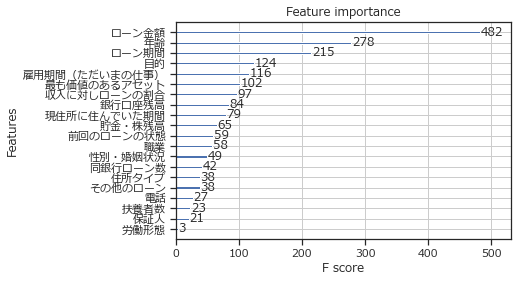

In [114]:
xgb.plot_importance(scores['estimator'][0])

In [113]:
credit_X.columns

Index(['銀行口座残高', 'ローン期間', '前回のローンの状態', '目的', 'ローン金額', '貯金・株残高',
       '雇用期間（ただいまの仕事）', '収入に対しローンの割合', '性別・婚姻状況', '保証人', '現住所に住んでいた期間',
       '最も価値のあるアセット', '年齢', 'その他のローン', '住所タイプ', '同銀行ローン数', '職業', '扶養者数', '電話',
       '労働形態', '年齢_cat', 'ローン期間_cat', 'ローン金額_cat'],
      dtype='object')

# Hyperparameter optimization using optuna  

In [13]:
import optuna 

def objective(trial):

    #Loading data
    chipruned_X = pd.read_csv("chipruned.csv", index_col=0).drop("信用(Y)", axis=1)
    chipruned_Y = pd.read_csv("chipruned.csv", index_col=0)["信用(Y)"].copy(deep=True)


    #hyperparameter space for optimization
    param = {
        "silent": 1,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)


    # helper method for evaluating model 
    def evaluate_model(X, y, metric, model):
        # define the evaluation procedure
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        # evaluate the model on the dataset
        scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        # return scores from each fold and each repeat
        return scores

    #Scording method
    ftwo_scorer = make_scorer(fbeta_score, beta=2)


    pipe = Pipeline([("OneHot", OneHotEncoder(dtype='int', handle_unknown="ignore")), ("SMOTETomek", SMOTETomek()), ("XGBDefault", xgb.XGBClassifier(**param))])

    #scores
    scores = evaluate_model(chipruned_X, chipruned_Y, ftwo_scorer, pipe) 
    return(np.mean(scores))

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)
print(study.best_trial)

075.
[I 2021-04-15 14:42:52,887] Trial 449 finished with value: 0.688463277596652 and parameters: {'booster': 'gbtree', 'lambda': 0.0018273463453888324, 'alpha': 1.584728479626791e-05, 'max_depth': 1, 'eta': 0.004640197220244369, 'gamma': 0.001217169183831373, 'grow_policy': 'lossguide'}. Best is trial 364 with value: 0.6889177541911075.
[I 2021-04-15 14:42:53,817] Trial 450 finished with value: 0.688463277596652 and parameters: {'booster': 'gbtree', 'lambda': 1.5538470564126942e-06, 'alpha': 9.635227794123355e-06, 'max_depth': 1, 'eta': 0.008366927553959772, 'gamma': 0.0033625827203945884, 'grow_policy': 'lossguide'}. Best is trial 364 with value: 0.6889177541911075.
[I 2021-04-15 14:42:54,704] Trial 451 finished with value: 0.688463277596652 and parameters: {'booster': 'gbtree', 'lambda': 2.0093241414178454e-06, 'alpha': 8.44437803509933e-06, 'max_depth': 1, 'eta': 0.005858643776952516, 'gamma': 0.002176231102166898, 'grow_policy': 'lossguide'}. Best is trial 364 with value: 0.688917